<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group10/kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 61.9 MB/s eta 0:00:00


In [85]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [86]:
train_path = '/content/drive/My Drive/Project/train.csv'
test_path = '/content/drive/My Drive/Project/test.csv'

In [88]:
train_data = pd.read_csv(train_path)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [107]:
test_data = pd.read_csv(test_path)
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


**EXPLORATORY DATA ANALYSIS**

In [90]:
# Check the shape of the DataFrame
print(f"Shape of the DataFrame (rows, columns):\n{train_data.shape}")

# Display the column names
print(f"Column names:\n{train_data.columns}")

# Display the first few rows of the DataFrame
print(f"First few rows of the DataFrame:\n{train_data.head()}")



Shape of the DataFrame (rows, columns):
(8693, 14)
Column names:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
First few rows of the DataFrame:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0        

In [91]:
# Summary statistics
print(train_data.describe())

# Check for missing values
print(f"missing values:\n { train_data.isnull().sum()}")

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
missing values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
De

In [92]:
# Display the column names
print(f" Description of Columns:\n{train_data.dtypes}")

 Description of Columns:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


<ipython-input-23-7915a6636b91>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


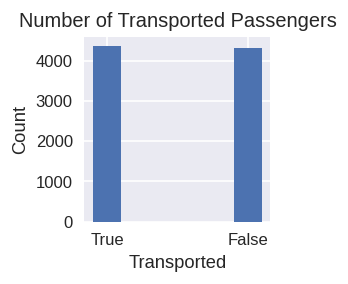

In [23]:
trans = train_data.Transported.value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(2,2), dpi=120)
plt.bar (trans.index.astype(str), trans, width=0.2)
plt.xlabel('Transported')
plt.ylabel('Count')
plt.title('Number of Transported Passengers')
plt.show()

In [24]:
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Name            200
Cabin           199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [27]:
train_data['Transported'] = train_data['Transported'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

In [28]:
#splitting the cabin entry

train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)

In [29]:
# Drop the 'Cabin' column with error handling
train_data = train_data.drop('Cabin', axis=1, errors='ignore')


In [30]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


In [33]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset, validation_ratio=0.20):
    train_ds_pd, valid_ds_pd = train_test_split(dataset, test_size=validation_ratio, random_state=42)
    return train_ds_pd, valid_ds_pd

train, valid = split_dataset(train_data)
print("{} examples in training, {} examples in validation.".format(
    len(train), len(valid)))


6954 examples in training, 1739 examples in validation.


In [34]:
train = tfdf.keras.pd_dataframe_to_tf_dataset(train, label='Transported')
valid = tfdf.keras.pd_dataframe_to_tf_dataset(valid, label='Transported')

In [35]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [101]:
model1 = tfdf.keras.CartModel()
model1.compile(metrics='accuracy')

Use /tmp/tmpeu96etrl as temporary training directory


In [102]:
model1.fit(x=train, logging_dir='logs')

Reading training dataset...
Training dataset read in 0:00:00.363832. Found 6954 examples.
Training model...
Model trained in 0:00:00.619537
Compiling model...
Model compiled.


In [103]:
tfdf.model_plotter.plot_model_in_colab(model1, tree_idx=0, max_depth=3)

In [104]:
evaluation = model1.evaluate(x=valid,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 0.7648
loss: 0.0000
accuracy: 0.7648


In [108]:
# Replace NaN values with zero
submission_id = test_data.PassengerId

test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_data['VIP'] = test_data['VIP'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

In [109]:
# Get the predictions for testdata
predictions = model1.predict(test)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 10ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [96]:
output.to_csv('predictions.csv', index=False)

None


In [98]:
import os

# Get the current working directory
cwd = os.getcwd()

In [99]:
# Construct the file path to the saved CSV file
file_path = os.path.join(cwd, 'predictions.csv')

# Print the file path
print("Saved file path:", file_path)

Saved file path: /content/predictions.csv


In [100]:
from google.colab import files

files.download('/content/predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Other models**

In [110]:
model2 = tfdf.keras.GradientBoostedTreesModel()
model2.compile(metrics='accuracy')

Use /tmp/tmp12pofinl as temporary training directory


In [125]:
history2 = model2.fit(x=train, logging_dir='logs')

Reading training dataset...
Training dataset read in 0:00:00.069557. Found 6954 examples.
Training model...
Model trained in 0:00:00.377795
Compiling model...
Model compiled.


In [121]:
tfdf.model_plotter.plot_model_in_colab(model2, tree_idx=0, max_depth=3)

In [122]:
evaluation2 = model2.evaluate(x=valid,return_dict=True)

for name, value in evaluation2.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.7849
loss: 0.0000
accuracy: 0.7849
